In [2]:
import pandas as pd
# FILEPATH: /home/ziming/ziming/machine-learning-issues/pytorch-CycleGAN-and-pix2pix/checkpoints/maps_cyclegan/visualization.ipynb
file_path = "loss_log.txt"

with open(file_path, "r") as file:
    lines = file.readlines()

data = []
for line in lines:
    if "(epoch:" in line:
        data.append(line.strip())

# Create a dictionary to store the column labels and corresponding data
columns = ['epoch', 'iters', 'time', 'data', 'D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
data_dict = {col: [] for col in columns}

# Parse the data and store it in the dictionary
for line in data:
    values = line.split()
    data_dict['epoch'].append(int(values[1][:-1]))
    data_dict['iters'].append(int(values[3][:-1]))
    data_dict['time'].append(float(values[5][:-1]))
    data_dict['data'].append(float(values[7][:-1]))
    data_dict['D_A'].append(float(values[9][:-1]))
    data_dict['G_A'].append(float(values[11][:-1]))
    data_dict['cycle_A'].append(float(values[13][:-1]))
    data_dict['idt_A'].append(float(values[15][:-1]))
    data_dict['D_B'].append(float(values[17][:-1]))
    data_dict['G_B'].append(float(values[19][:-1]))
    data_dict['cycle_B'].append(float(values[21][:-1]))
    data_dict['idt_B'].append(float(values[23]))

# Create the dataframe
df = pd.DataFrame(data_dict)

print(df)


     epoch  iters   time   data   D_A   G_A  cycle_A  idt_A   D_B   G_B  \
0        1    100  0.485  0.129  0.39  0.35     2.33   0.59  0.39  0.42   
1        1    200  0.491  0.001  0.49  0.28     1.10   0.69  0.35  0.20   
2        1    300  0.495  0.001  0.24  0.25     1.16   0.55  0.26  0.32   
3        1    400  0.662  0.001  0.37  0.50     1.34   0.33  0.27  0.29   
4        1    500  0.498  0.001  0.18  0.38     1.21   0.24  0.41  0.58   
..     ...    ...    ...    ...   ...   ...      ...    ...   ...   ...   
768     71    180  0.498  0.001  0.28  0.46     0.59   0.08  0.18  0.37   
769     71    280  0.500  0.001  0.10  0.30     0.77   0.06  0.26  0.14   
770     71    380  0.496  0.001  0.11  0.49     0.49   0.11  0.12  0.26   
771     71    480  0.621  0.001  0.19  0.44     0.68   0.07  0.14  0.11   
772     71    580  0.499  0.001  0.04  0.12     0.56   0.24  0.25  0.25   

     cycle_B  idt_B  
0       1.23  1.084  
1       1.70  0.599  
2       1.12  0.483  
3       0.7

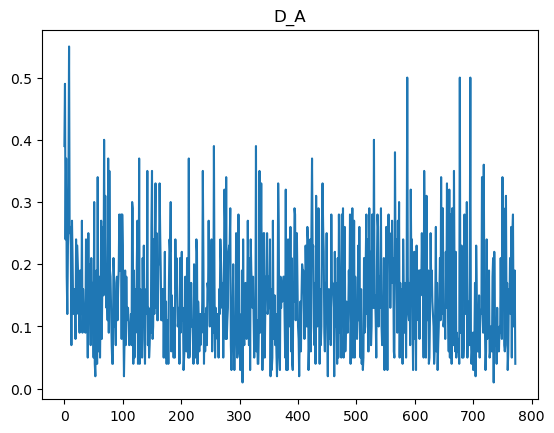

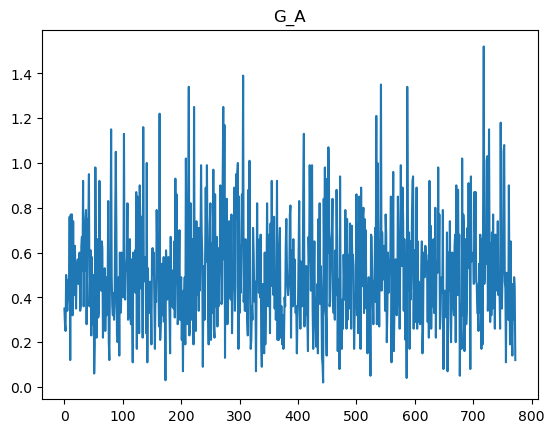

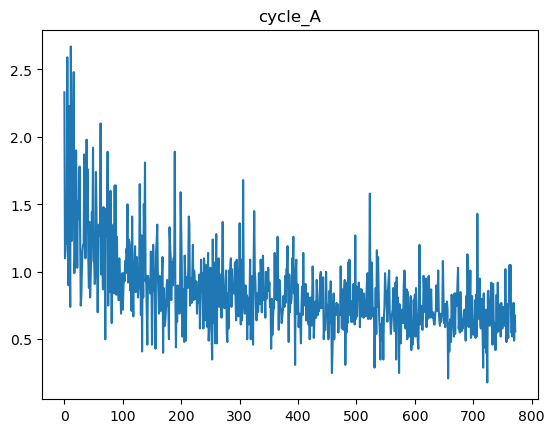

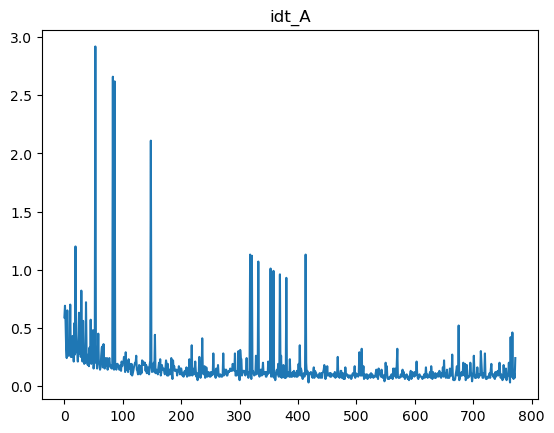

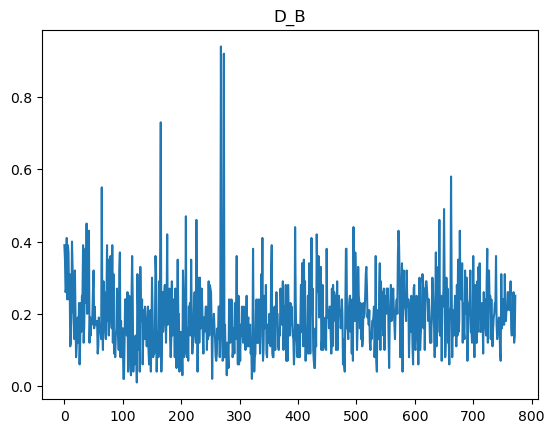

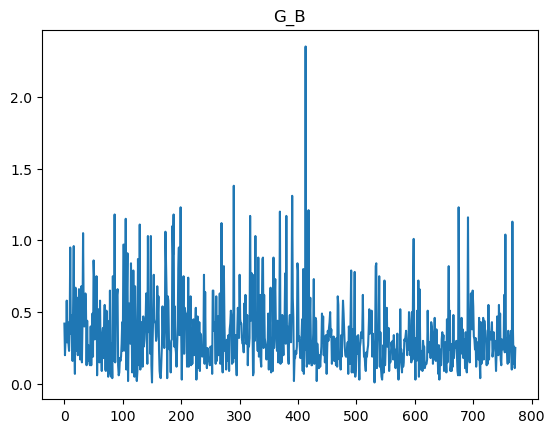

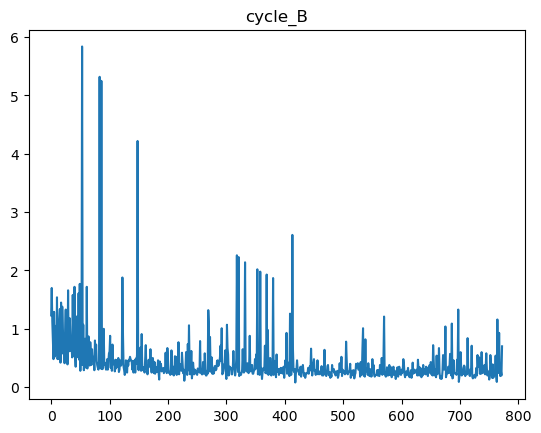

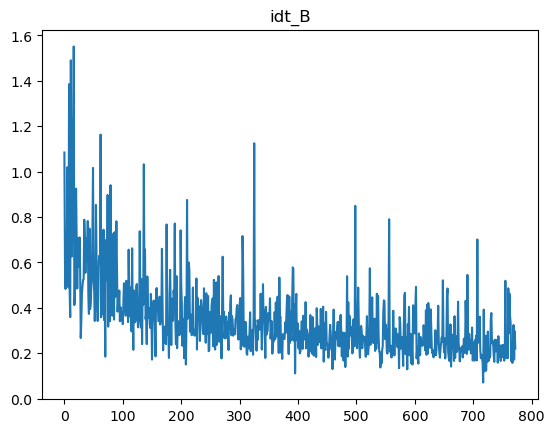

In [4]:
import matplotlib.pyplot as plt

# Create separate plots for each column
for column in ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']:
    plt.figure()
    df[column].plot()
    plt.title(column)
    plt.show()


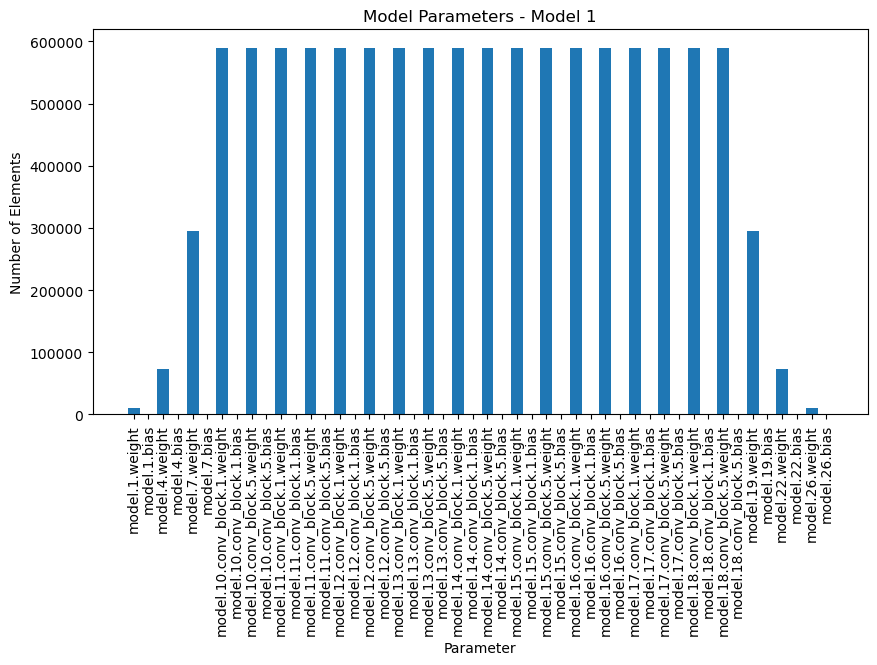

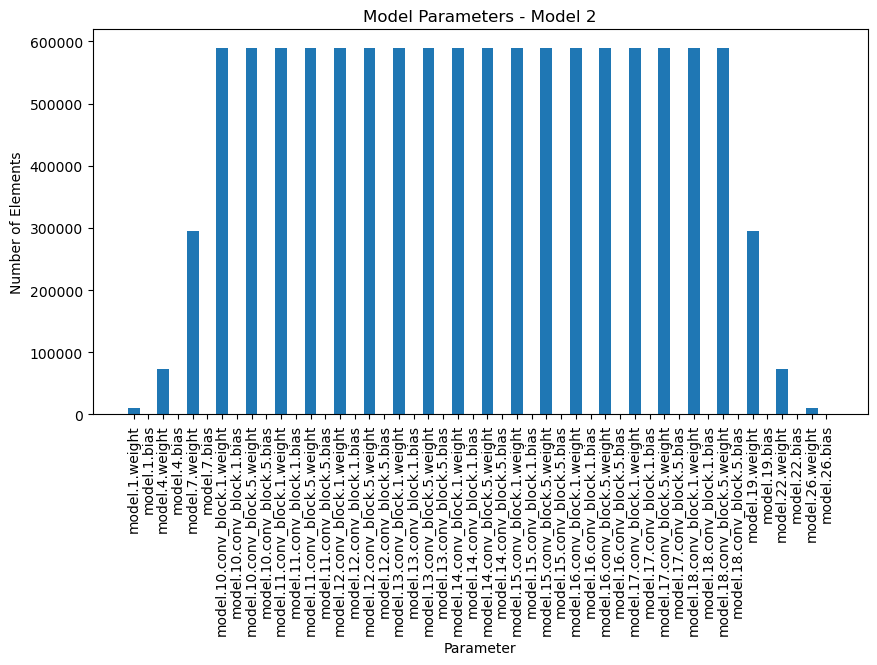

OrderedDict([('model.1.weight', tensor([[[[-1.4890e-02,  9.1537e-02, -5.6180e-02,  ..., -1.8191e-02,
            1.6270e-02,  4.2709e-02],
          [ 3.5976e-03, -3.4942e-02, -1.9301e-02,  ..., -2.9097e-02,
           -9.8944e-03, -9.6896e-03],
          [-1.2351e-01,  1.0041e-01, -9.0690e-02,  ..., -7.6397e-02,
            3.2105e-02, -2.2311e-02],
          ...,
          [-8.0176e-02,  2.6036e-02, -1.5369e-01,  ..., -5.3892e-02,
           -2.8957e-02,  1.4726e-02],
          [-1.1896e-02,  5.7162e-02, -7.5231e-02,  ..., -6.8327e-02,
            9.3457e-03, -1.8575e-02],
          [-9.2828e-03,  4.4420e-02, -6.2912e-02,  ...,  1.6571e-02,
           -3.3117e-02,  1.9686e-02]],

         [[ 2.9100e-02, -6.2513e-02,  4.8060e-02,  ..., -1.5267e-02,
           -2.3994e-02, -1.1472e-02],
          [ 2.3669e-02, -3.8769e-02,  1.8652e-02,  ...,  3.8217e-02,
            5.9889e-02, -5.8230e-02],
          [ 1.1367e-01, -4.7139e-02,  6.9884e-02,  ...,  2.0081e-02,
           -1.0406e-02,  6

In [12]:
import torch

# Specify the file paths
file_path1 = "latest_net_G_B.pth"
file_path2 = "65_net_G_B.pth"

# Load the state dictionaries of the models
state_dict1 = torch.load(file_path1)
state_dict2 = torch.load(file_path2)

# Compare the state dictionaries
import matplotlib.pyplot as plt

# Get the keys of the state dictionaries
keys1 = state_dict1.keys()
keys2 = state_dict2.keys()

# Plot the parameters of the first model
plt.figure(figsize=(10, 5))
plt.bar(keys1, [state_dict1[key].numel() for key in keys1])
plt.xticks(rotation=90)
plt.xlabel('Parameter')
plt.ylabel('Number of Elements')
plt.title('Model Parameters - Model 1')
plt.show()

# Plot the parameters of the second model
plt.figure(figsize=(10, 5))
plt.bar(keys2, [state_dict2[key].numel() for key in keys2])
plt.xticks(rotation=90)
plt.xlabel('Parameter')
plt.ylabel('Number of Elements')
plt.title('Model Parameters - Model 2')
plt.show()
print(state_dict1)


In [14]:

# Check if state_dict1 and state_dict2 are equal for the key 'model.26.weight'
are_equal = torch.allclose(state_dict1['model.26.weight'], state_dict2['model.26.weight'])
if are_equal:
    print("state_dict1 and state_dict2 are equal for the key 'model.26.weight'")
else:
    print("state_dict1 and state_dict2 are not equal for the key 'model.26.weight'")




True
state_dict1 and state_dict2 are equal for the key 'model.26.weight'


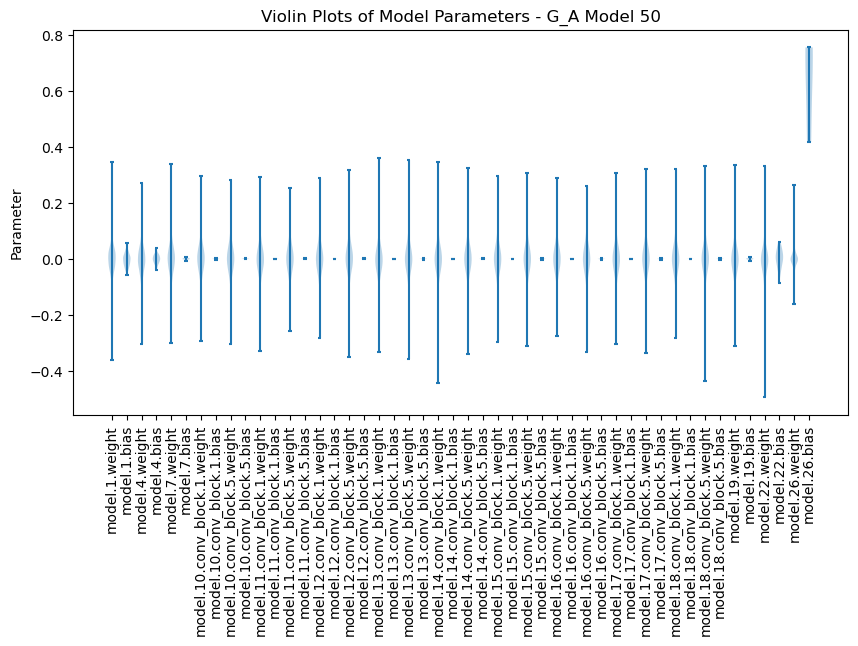

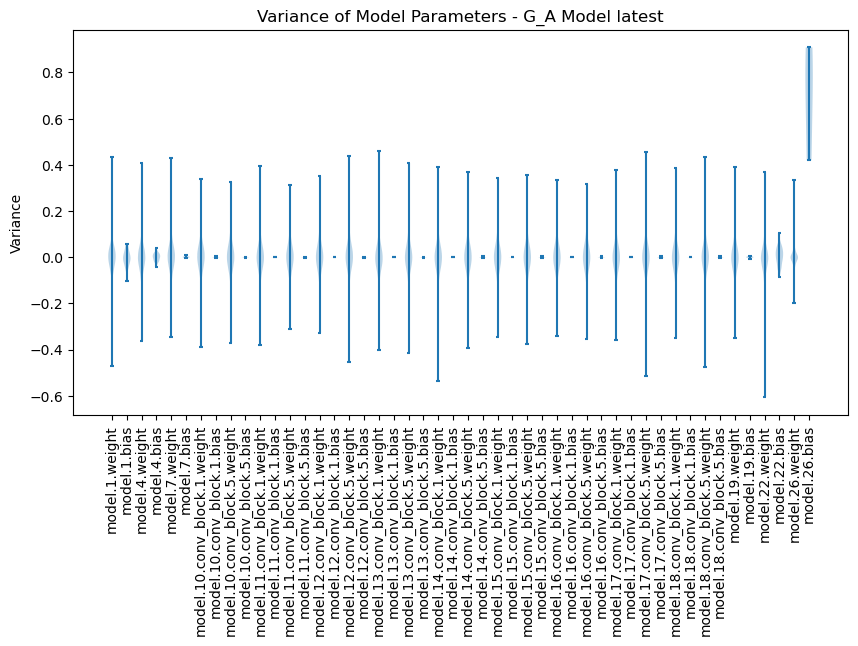

In [22]:
import torch
import numpy as np
# Specify the file paths

loss_type = "G_A"
epoch = "50"



file_path1 = f"{epoch}_net_{loss_type}.pth"


# Load the state dictionaries of the models
state_dict1 = torch.load(file_path1)

# Get the keys of the state dictionaries
keys1 = state_dict1.keys()


# Calculate the average and variance of the model parameters for each key
avg_params1 = []
var_params1 = []


import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Create a list to store the violinplot data
violin_data = []

# Iterate over each key in keys1
for key in keys1:
    params1 = state_dict1[key].numpy().flatten()
    avg_params1.append(np.mean(params1))
    var_params1.append(np.var(params1))
    violin_data.append(params1)

# Create the violinplot
ax.violinplot(violin_data)

# Set the x-axis tick labels
ax.set_xticks(np.arange(1, len(keys1) + 1))
ax.set_xticklabels(keys1, rotation=90)

# Set the y-axis label
ax.set_ylabel('Parameter')

# Set the title
ax.set_title(f'Violin Plots of Model Parameters - {loss_type} Model {epoch}')

# Show the plot
plt.show()




# Plot the average and variance of the model parameters for Model 1
# plt.figure(figsize=(10, 5))
# plt.bar(keys1, avg_params1)
# plt.xticks(rotation=90)
# plt.xlabel('Parameter')
# plt.ylabel('Average')
# plt.title(f'Average Model Parameters - {loss_type} Model {epoch}')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.bar(keys1, var_params1)
# plt.xticks(rotation=90)
# plt.xlabel('Parameter')
# plt.ylabel('Variance')
# plt.title(f'Variance of Model Parameters - {loss_type} Model {epoch}')
# plt.show()

file_path2 = f"latest_net_{loss_type}.pth"
state_dict2 = torch.load(file_path2)
keys2 = state_dict2.keys()

violin_data2 = []
avg_params2 = []
var_params2 = []

fig, ax = plt.subplots(figsize=(10, 5))

for key in keys2:
    params2 = state_dict2[key].numpy().flatten()
    avg_params2.append(np.mean(params2))
    var_params2.append(np.var(params2))
    violin_data2.append(params2)


# Create the violinplot
ax.violinplot(violin_data2)

# Set the x-axis tick labels
ax.set_xticks(np.arange(1, len(keys1) + 1))
ax.set_xticklabels(keys1, rotation=90)

# Set the y-axis label
ax.set_ylabel('Parameter')

# Set the title
ax.set_title(f'Violin Plots of Model Parameters - {loss_type} Model latest')


# # Plot the average and variance of the model parameters for Model 2
# plt.figure(figsize=(10, 5))
# plt.bar(keys2, avg_params2)
# plt.xticks(rotation=90)
# plt.xlabel('Parameter')
# plt.ylabel('Average')
# plt.title(f'Average Model Parameters - {loss_type} Model latest')
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.bar(keys2, var_params2)
# plt.xticks(rotation=90)
# plt.xlabel('Parameter')
plt.ylabel('Variance')
plt.title(f'Variance of Model Parameters - {loss_type} Model latest')
plt.show()
